In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["axes.unicode_minus"]=False #用于显示负号
plt.rcParams['font.sans-serif']=['SimHei'] #用于显示中文

In [2]:
data = pd.read_csv("surveydata.csv",sep=',',header=0)

In [3]:
data

,id,提交答卷时间,所用时间,来源,来源详情,来自IP,目前恋爱状态,恋爱次数,结婚意愿,4、您的理想结婚年龄为,...,性别,年龄,来自,户口,25、请问您目前从事的职业为,26、请问您的最高学历是（包括在读）,27、请问您是否为独生子女,28、请问您的月消费区间为,29、如果您对我们的调查结果感兴趣，可以留下您的电子邮箱地址，我们将在课题完成后向您发送研究报告,总分
0,1,2022/11/10 12:54,250秒,微信,NaN,202.120.235.202(上海-上海),单身，无恋爱打算,3,不知道，顺其自然,26-30,...,男,23,山东,城镇,全日制学生,硕士,是,5000-1万,(空),0
1,2,2022/11/10 12:54,183秒,微信,NaN,202.120.235.88(上海-上海),单身，无恋爱打算,0,不知道，顺其自然,26-30,...,男,21,上海,城镇,全日制学生,硕士,是,1000-3000,(空),0
2,3,2022/11/10 12:55,166秒,微信,NaN,223.104.210.217(上海-上海),单身，有恋爱打算,1,有结婚打算,26-30,...,男,23,上海,城镇,全日制学生,硕士,是,1000-3000,(空),0
3,4,2022/11/10 12:55,170秒,手机提交,直接访问,183.192.11.120(上海-上海),单身，有恋爱打算,3,有结婚打算,26-30,...,男,22,上海,城镇,全日制学生,本科,是,3000-5000,(空),0
4,5,2022/11/10 12:56,254秒,微信,NaN,101.82.242.152(上海-上海),单身，无恋爱打算,1,不知道，顺其自然,26-30,...,女,22,湖北,城镇,全日制学生,硕士,是,1000-3000,(空),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,541,2022/11/27 20:31,185秒,手机提交,直接访问,202.200.238.130(陕西-西安),正在恋爱中,2,有结婚打算,26-30,...,男,23,河南,农村,全日制学生,硕士,否,1000-3000,(空),0
541,542,2022/11/27 21:17,179秒,手机提交,直接访问,1.85.33.73(陕西-西安),单身，有恋爱打算,2,有结婚打算,26-30,...,男,20,河南,城镇,全日制学生,本科,是,1000-3000,(空),0
542,543,2022/11/29 0:37,269秒,手机提交,直接访问,61.185.212.153(陕西-西安),正在恋爱中,2,有结婚打算,26-30,...,男,24,河北,城镇,全日制学生,硕士,是,1000-3000,835981083@qq.com,0
543,544,2022/11/29 9:08,237秒,手机提交,直接访问,113.201.132.189(陕西-西安),正在恋爱中,1,有结婚打算,26-30,...,男,22,河北,农村,全日制学生,本科,否,1000-3000,2463021186@qq.com,0


### 截取需要分析的数据

In [4]:
#截取出需要用于机器学习算法分析的数据
df = data[['性别','年龄','户口','上网时长',
           '目前恋爱状态','恋爱次数','结婚意愿','意愿子女数','理想子女数','理想儿子','理想女儿',
           '动漫','综艺','体育/电竞','明星','科技/数码','网文','游戏',
           '微博','知乎','豆瓣','虎扑','百度贴吧','小红书','B站','短视频',
           '朋友圈秀恩爱晒娃','恋爱相亲育儿综艺','国家生育政策','专家教授发表看法','娱乐圈情感八卦','身边人经历','艺术作品']]

df.isnull().sum() #检查有无缺失值。发现没有

性别          0
年龄          0
户口          0
上网时长        0
目前恋爱状态      0
恋爱次数        0
结婚意愿        0
意愿子女数       0
理想子女数       0
理想儿子        0
理想女儿        0
动漫          0
综艺          0
体育/电竞       0
明星          0
科技/数码       0
网文          0
游戏          0
微博          0
知乎          0
豆瓣          0
虎扑          0
百度贴吧        0
小红书         0
B站          0
短视频         0
朋友圈秀恩爱晒娃    0
恋爱相亲育儿综艺    0
国家生育政策      0
专家教授发表看法    0
娱乐圈情感八卦     0
身边人经历       0
艺术作品        0
dtype: int64

In [5]:
df.loc[df['恋爱次数']=='4及以上','恋爱次数'] = 4 #设定恋爱次数为4及以上的统统变为4
df.loc[df['意愿子女数']=='4个及以上','意愿子女数'] = 4 #设定意愿子女数为4及以上的统统变为4
df.loc[df['理想子女数']=='4个及以上','理想子女数'] = 4 #设定理想子女数为4及以上的统统变为4
df.loc[df['理想儿子']=='4个及以上','理想儿子'] = 4
df.loc[df['理想女儿']=='4个及以上','理想女儿'] = 4

df.loc[df['上网时长']=='2小时及以下','上网时长'] = 1
df.loc[df['上网时长']=='2-4小时','上网时长'] = 3
df.loc[df['上网时长']=='4-6小时','上网时长'] = 5
df.loc[df['上网时长']=='6-8小时','上网时长'] = 7
df.loc[df['上网时长']=='8小时及以上','上网时长'] = 9
df_inttime = df['上网时长'].astype(int)
df_inttime.columns = ['上网时长']

df[['恋爱次数','意愿子女数','理想子女数','理想儿子','理想女儿']] = df[['恋爱次数','意愿子女数','理想子女数','理想儿子','理想女儿']].astype(int) #将数值字段全变为Int类型
df_y = df[['恋爱次数','意愿子女数','理想子女数','理想儿子','理想女儿']]  #这些可以认为是回归的因变量
df_y.columns = ['恋爱次数','意愿子女数','理想子女数','理想儿子','理想女儿']  #给因变量y附上列名

df_child = df[['意愿子女数','理想子女数','理想儿子','理想女儿']]
df_child.columns = ['意愿子女数','理想子女数','理想儿子','理想女儿']

df_sex = df['性别']

C:\Users\24561\AppData\Local\Temp\ipykernel_18128\1635946789.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['恋爱次数','意愿子女数','理想子女数','理想儿子','理想女儿']] = df[['恋爱次数','意愿子女数','理想子女数','理想儿子','理想女儿']].astype(int) #将数值字段全变为Int类型


In [6]:
df.dtypes #查看字段属性，发现全为object属性。需要将其中的一些变为int属性

性别          object
年龄           int64
户口          object
上网时长        object
目前恋爱状态      object
恋爱次数         int32
结婚意愿        object
意愿子女数        int32
理想子女数        int32
理想儿子         int32
理想女儿         int32
动漫          object
综艺          object
体育/电竞       object
明星          object
科技/数码       object
网文          object
游戏          object
微博          object
知乎          object
豆瓣          object
虎扑          object
百度贴吧        object
小红书         object
B站          object
短视频         object
朋友圈秀恩爱晒娃    object
恋爱相亲育儿综艺    object
国家生育政策      object
专家教授发表看法    object
娱乐圈情感八卦     object
身边人经历       object
艺术作品        object
dtype: object

### 数据预处理

In [7]:
#数据预处理导库（主要针对类别数据）
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import KBinsDiscretizer

In [8]:
le = LabelEncoder()
le_f = le.fit(df['性别'])
sex_label = le_f.transform(df['性别']) #性别：男生为1，女生为0
df_sex = pd.DataFrame(sex_label)
df_sex.columns = ['性别']

In [9]:
le = LabelEncoder()
le_resid = le.fit(df['户口'])
resid_label = le_resid.transform(df['户口'])
df_resid = pd.DataFrame(resid_label)
df_resid.columns = ['户口']

In [10]:
le = LabelEncoder()
le_love = le.fit(df['目前恋爱状态'])
love_label = le_love.transform(df['目前恋爱状态'])
df_love = pd.DataFrame(love_label)
df_love.columns = ['恋爱状态']

ohe = OneHotEncoder(categories='auto')
ohe_love = ohe.fit(df_love)
ohe_res = ohe_love.transform(df_love).toarray()
df_ohe_love = pd.DataFrame(ohe_res)
df_ohe_love.columns = ['单身无恋爱','单身想恋爱','恋爱中']

In [11]:
df_love

,恋爱状态
0,0
1,0
2,1
3,1
4,0
...,...
540,2
541,1
542,2
543,2


In [12]:
oe_marri = OrdinalEncoder(categories=[['不会，打算单身','不会，但接受同居','不知道，顺其自然','有结婚打算']]) #结婚意愿为一个分类的指标
oe_marriage = oe_marri.fit(np.array(df.loc[:,'结婚意愿']).reshape(-1,1))
marriage_intent = oe_marriage.transform(np.array(df.loc[:,'结婚意愿']).reshape(-1,1)) #结婚意愿：0:不会，打算单身 1:不会，接受同居 2：不知道，顺其自然 3:打算结婚
df_marriageintent = pd.DataFrame(marriage_intent)
df_marriageintent.columns = ['结婚意愿']

In [13]:
column_num = len(df.loc[:,'动漫':'游戏'].columns)
cates1 = ["不参与","参与较少","参与较多","参与程度极高"]
oe_part = OrdinalEncoder(categories=[cates1]*column_num) #对圈层参与程度进行程度的等级化,此刻需要按照一定顺序
oe_participate = oe_part.fit(df.loc[:,'动漫':'游戏'])
participation = oe_participate.transform(df.loc[:,'动漫':'游戏'])  #0：不参与 1：参与较少 2：参与较多 3：参与程度极高
df_participation = pd.DataFrame(participation)
df_participation.columns = ['动漫','综艺','体育/电竞','明星','科技/数码','网文','游戏']

In [14]:
column_num = len(df.loc[:,'微博':'短视频'].columns)
cates2 = ["完全不使用","使用较少","使用较多","使用频率极高"]
oe_use = OrdinalEncoder(categories=[cates2]*column_num) #对APP使用程度进行程度的等级化,此刻需要按照一定顺序
oe_usage = oe_use.fit(df.loc[:,'微博':'短视频'])
usage = oe_usage.transform(df.loc[:,'微博':'短视频'])  #0：完全不使用 1：使用较少 2：使用较多 3：使用频率极高
df_usage = pd.DataFrame(usage)
df_usage.columns = ['微博','知乎','豆瓣','虎扑','百度贴吧','小红书','B站','短视频']

In [15]:
column_num = len(df.loc[:,'朋友圈秀恩爱晒娃':'艺术作品'].columns)
cates3 = ["完全不影响","影响较少","影响较大","影响极大"]
oe_influ = OrdinalEncoder(categories=[cates3]*column_num) #对受互联网影响程度进行程度的等级化,此刻需要按照一定顺序
oe_influence = oe_influ.fit(df.loc[:,'朋友圈秀恩爱晒娃':'艺术作品'])
influence = oe_influence.transform(df.loc[:,'朋友圈秀恩爱晒娃':'艺术作品'])  #0：完全不影响 1：影响较少 2：影响较大 3：影响极大
df_influence = pd.DataFrame(influence)
df_influence.columns = ['朋友圈秀恩爱晒娃','恋爱相亲育儿综艺','国家生育政策','专家教授发表看法','娱乐圈情感八卦','身边人经历','艺术作品']

In [16]:
df_influence

,朋友圈秀恩爱晒娃,恋爱相亲育儿综艺,国家生育政策,专家教授发表看法,娱乐圈情感八卦,身边人经历,艺术作品
0,2.0,0.0,1.0,1.0,1.0,3.0,2.0
1,2.0,1.0,1.0,0.0,0.0,2.0,1.0
2,1.0,0.0,2.0,0.0,0.0,2.0,0.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,3.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...
540,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541,1.0,1.0,3.0,1.0,1.0,2.0,2.0
542,0.0,0.0,1.0,0.0,1.0,2.0,1.0
543,1.0,0.0,0.0,0.0,0.0,2.0,1.0


In [17]:
df_pro = pd.concat([df_y,df_sex,df_resid,df_ohe_love,df_marriageintent,df_inttime,df_participation,df_usage,df_influence],axis=1)

In [18]:
df_pro

,恋爱次数,意愿子女数,理想子女数,理想儿子,理想女儿,性别,户口,单身无恋爱,单身想恋爱,恋爱中,...,小红书,B站,短视频,朋友圈秀恩爱晒娃,恋爱相亲育儿综艺,国家生育政策,专家教授发表看法,娱乐圈情感八卦,身边人经历,艺术作品
0,3,2,2,1,1,1,1,1.0,0.0,0.0,...,1.0,3.0,0.0,2.0,0.0,1.0,1.0,1.0,3.0,2.0
1,0,1,1,0,1,1,1,1.0,0.0,0.0,...,1.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0
2,1,2,1,0,1,1,1,0.0,1.0,0.0,...,0.0,3.0,1.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0
3,3,2,2,1,1,1,1,0.0,1.0,0.0,...,1.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,0,0,0,1,1.0,0.0,0.0,...,3.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,2,1,0,0,0,1,0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541,2,0,0,0,0,1,1,0.0,1.0,0.0,...,0.0,3.0,0.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0
542,2,1,2,1,1,1,1,0.0,0.0,1.0,...,2.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0
543,1,1,1,0,1,1,0,0.0,0.0,1.0,...,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0


In [19]:
df_pro.dtypes #查看每个字段的类型

恋爱次数          int32
意愿子女数         int32
理想子女数         int32
理想儿子          int32
理想女儿          int32
性别            int32
户口            int32
单身无恋爱       float64
单身想恋爱       float64
恋爱中         float64
结婚意愿        float64
上网时长          int32
动漫          float64
综艺          float64
体育/电竞       float64
明星          float64
科技/数码       float64
网文          float64
游戏          float64
微博          float64
知乎          float64
豆瓣          float64
虎扑          float64
百度贴吧        float64
小红书         float64
B站          float64
短视频         float64
朋友圈秀恩爱晒娃    float64
恋爱相亲育儿综艺    float64
国家生育政策      float64
专家教授发表看法    float64
娱乐圈情感八卦     float64
身边人经历       float64
艺术作品        float64
dtype: object

### 分析男女性别差异抽样

In [20]:
#单拎出男性与女性的数据用于分析性别差异
df_male = df_pro[df_pro['性别']==1]
df_female = df_pro[df_pro['性别']==0]
df_male = df_male.reset_index(drop = True)
df_female = df_female.reset_index(drop = True)

#对男性与女性进行抽样，保证样本的平衡性
import random
index_choice_male = random.sample(list(df_male.index.values),200)
index_choice_female = random.sample(list(df_female.index.values),200)
df_male_chose = df_male.iloc[index_choice_male,:]
df_female_chose = df_female.iloc[index_choice_female,:]
df_male_chose = df_male_chose.reset_index(drop = True) #抽样后重新设定Index
df_female_chose = df_female_chose.reset_index(drop = True)

### 取出要研究的特征与标签

In [21]:
#先探究整体的情况。取出圈层、APP使用情况与互联网受影响因素的特征
df_circle = df_pro.loc[:,'动漫':'游戏']
df_app = df_pro.loc[:,'微博':'短视频']
df_exposure = df_pro.loc[:,'朋友圈秀恩爱晒娃':'艺术作品']
df_sex = df_pro.loc[:,'性别']
df_resid = df_pro.loc[:,'户口']
df_love = df_pro.loc[:,'单身无恋爱':'恋爱中']
df_age = df.loc[:,'年龄']
df_lovetime = df.loc[:,'恋爱次数']

#取出结婚意愿作为Label
label_time = df_pro.loc[:,'恋爱次数']
label_marry = df_pro.loc[:,'结婚意愿']
label_idealchild = df_pro.loc[:,'理想子女数']
label_desirechild = df_pro.loc[:,'意愿子女数']

In [22]:
#对于抽样出的男性与女性，同样取出特征与标签
df_circle_male = df_male_chose.loc[:,'动漫':'游戏']
df_app_male = df_male_chose.loc[:,'微博':'短视频']
df_exposure_male = df_male_chose.loc[:,'朋友圈秀恩爱晒娃':'艺术作品']
label_marry_male = df_male_chose.loc[:,'结婚意愿']
label_idealchild_male = df_male_chose.loc[:,'理想子女数']
label_desirechild_male = df_male_chose.loc[:,'意愿子女数']

df_circle_female = df_female_chose.loc[:,'动漫':'游戏']
df_app_female = df_female_chose.loc[:,'微博':'短视频']
df_exposure_female = df_female_chose.loc[:,'朋友圈秀恩爱晒娃':'艺术作品']
label_marry_female = df_female_chose.loc[:,'结婚意愿']
label_idealchild_female = df_female_chose.loc[:,'理想子女数']
label_desirechild_female = df_female_chose.loc[:,'意愿子女数']

### 将所有信息整合起来的聚类

In [23]:
from sklearn.cluster import KMeans

In [24]:
df_cluster = pd.concat([df_sex,df_age,df_resid,df_love,df_circle,df_app,df_exposure],axis=1)  

In [25]:
n_cluster = 5  #聚类的簇数
cluster = KMeans(n_clusters=n_cluster,random_state=63)
cluster_f = cluster.fit(df_cluster)

ypred = cluster_f.labels_  #返回每个样本所返回的标签
ypred = pd.DataFrame(ypred)
ypred.columns = ['聚类所在簇']

C:\Users\24561\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [26]:
print(cluster_f.score)

<bound method _BaseKMeans.score of KMeans(n_clusters=5, random_state=63)>


In [ ]:
df_res = pd.concat([ypred,df_marriageintent,df_y],axis=1)
df_res.columns = ['聚类所在簇','结婚意愿','恋爱次数','意愿子女数','理想子女数']

In [83]:
df_res

,聚类所在簇,结婚意愿,恋爱次数,意愿子女数,理想子女数
0,2,2.0,3,2,2
1,2,2.0,0,1,1
2,4,3.0,1,2,1
3,4,3.0,3,2,2
4,2,2.0,1,0,0
...,...,...,...,...,...
540,4,3.0,2,1,0
541,1,3.0,2,0,0
542,2,3.0,2,1,2
543,4,3.0,1,1,1


In [84]:
df_clu0 = df_res[df_res['聚类所在簇']==0]
df_clu1 = df_res[df_res['聚类所在簇']==1]
df_clu2 = df_res[df_res['聚类所在簇']==2]
df_clu4 = df_res[df_res['聚类所在簇']==4]
#第三个簇的样本数过小，仅有3个，故在这里直接抛去

In [85]:
df_mean0 = df_clu0.mean(axis=0)
df_mean1 = df_clu1.mean(axis=0)
df_mean2 = df_clu2.mean(axis=0)
df_mean4 = df_clu4.mean(axis=0)

In [86]:
df_mean0

聚类所在簇    0.00000
结婚意愿     2.43750
恋爱次数     2.15625
意愿子女数    1.09375
理想子女数    1.59375
dtype: float64

In [87]:
#发现效果并不好
marrintent_clu = [df_mean0[1],df_mean1[1],df_mean2[1],df_mean4[1]]
lovetime_clu = [df_mean0[2],df_mean1[2],df_mean2[2],df_mean4[2]]
desirechild_clu = [df_mean0[3],df_mean1[3],df_mean2[3],df_mean4[3]]
idealchild_clu = [df_mean0[4],df_mean1[4],df_mean2[4],df_mean4[4]]

In [88]:
print(marrintent_clu)
print(lovetime_clu)
print(desirechild_clu)
print(idealchild_clu)

[2.4375, 2.366336633663366, 2.13986013986014, 2.2109375]
[2.15625, 1.495049504950495, 1.3216783216783217, 1.2265625]
[1.09375, 1.3465346534653466, 0.9790209790209791, 1.1640625]
[1.59375, 1.603960396039604, 1.4685314685314685, 1.59375]


### 将年龄、性别、恋爱次数、圈层和APP使用作为因素聚类

In [89]:
df_cluster2 = pd.concat([df_sex,df_age,df_lovetime,df_circle,df_app],axis=1)  

In [90]:
n_cluster = 4  #聚类的簇数
cluster2 = KMeans(n_clusters=n_cluster,random_state=63)
cluster_f = cluster2.fit(df_cluster2)

ypred2 = cluster_f.labels_  #返回每个样本所返回的标签
ypred2 = pd.DataFrame(ypred2)
ypred2.columns = ['聚类所在簇']

C:\Users\24561\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [91]:
df_res2 = pd.concat([ypred2,df_marriageintent,df_child],axis=1)
df_res2.columns = ['聚类所在簇','结婚意愿','意愿子女数','理想子女数']

df_clu0 = df_res2[df_res2['聚类所在簇']==0]
df_clu1 = df_res2[df_res2['聚类所在簇']==1]
df_clu2 = df_res2[df_res2['聚类所在簇']==2]
df_clu3 = df_res2[df_res2['聚类所在簇']==3]

df_mean0 = df_clu0.mean(axis=0)
df_mean1 = df_clu1.mean(axis=0)
df_mean2 = df_clu2.mean(axis=0)
df_mean3 = df_clu3.mean(axis=0)

marrintent_clu = [df_mean0[1],df_mean1[1],df_mean2[1],df_mean3[1]]
desirechild_clu = [df_mean0[2],df_mean1[2],df_mean2[2],df_mean3[2]]
idealchild_clu = [df_mean0[3],df_mean1[3],df_mean2[3],df_mean3[3]]

In [92]:
print(marrintent_clu)
print(desirechild_clu)
print(idealchild_clu)

[2.201492537313433, 2.160839160839161, 2.1481481481481484, 2.3544303797468356]
[1.2388059701492538, 1.0, 1.1216931216931216, 1.1772151898734178]
[1.6044776119402986, 1.4615384615384615, 1.4973544973544974, 1.6329113924050633]


#### 将圈层和APP使用作为因素聚类

In [29]:
df_cluster3 = pd.concat([df_inttime,df_lovetime,df_circle,df_app],axis=1)  

In [30]:
n_cluster = 4  #聚类的簇数
cluster3 = KMeans(n_clusters=n_cluster,random_state=63)
cluster_f = cluster3.fit(df_cluster3)

ypred3 = cluster_f.labels_  #返回每个样本所返回的标签
ypred3 = pd.DataFrame(ypred3)
ypred3.columns = ['聚类所在簇']

C:\Users\24561\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [31]:
df_res3 = pd.concat([ypred3,df_lovetime,df_marriageintent,df_child,df_sex],axis=1)
df_res3.columns = ['聚类所在簇','恋爱次数','结婚意愿','意愿子女数','理想子女数','理想儿子','理想女儿','性别']

df_clu0 = df_res3[df_res3['聚类所在簇']==0]
df_clu1 = df_res3[df_res3['聚类所在簇']==1]
df_clu2 = df_res3[df_res3['聚类所在簇']==2]
df_clu3 = df_res3[df_res3['聚类所在簇']==3]

df_mean0 = df_clu0.mean(axis=0)
df_mean1 = df_clu1.mean(axis=0)
df_mean2 = df_clu2.mean(axis=0)
df_mean3 = df_clu3.mean(axis=0)

df_clu0_sex = df_clu0.loc[:,'性别']
df_clu1_sex = df_clu1.loc[:,'性别']
df_clu2_sex = df_clu2.loc[:,'性别']
df_clu3_sex = df_clu3.loc[:,'性别']

lovetime_clu = [df_mean0[1],df_mean1[1],df_mean2[1],df_mean3[1]]
marrintent_clu = [df_mean0[2],df_mean1[2],df_mean2[2],df_mean3[2]]
desirechild_clu = [df_mean0[3],df_mean1[3],df_mean2[3],df_mean3[3]]
idealchild_clu = [df_mean0[4],df_mean1[4],df_mean2[4],df_mean3[4]]
idealboy_clu = [df_mean0[5],df_mean1[5],df_mean2[5],df_mean3[5]]
idealgirl_clu = [df_mean0[6],df_mean1[6],df_mean2[6],df_mean3[6]]

In [32]:
df_clu3

,聚类所在簇,恋爱次数,结婚意愿,意愿子女数,理想子女数,理想儿子,理想女儿,性别
0,3,3,2.0,2,2,1,1,1
7,3,1,1.0,0,0,0,0,1
10,3,2,3.0,1,1,1,1,1
13,3,1,3.0,2,4,1,1,0
15,3,1,2.0,1,2,0,2,1
...,...,...,...,...,...,...,...,...
520,3,4,2.0,2,2,1,1,0
533,3,4,2.0,1,2,3,3,1
535,3,1,1.0,0,0,0,0,0
539,3,0,3.0,1,2,1,1,1


In [33]:
print(lovetime_clu)
print(marrintent_clu)
print(desirechild_clu)
print(idealchild_clu)
print(idealboy_clu)
print(idealgirl_clu)

[1.617391304347826, 0.8035714285714286, 1.1810344827586208, 1.547945205479452]
[2.2956521739130435, 2.1726190476190474, 1.9913793103448276, 2.3013698630136985]
[1.208695652173913, 1.1607142857142858, 1.043103448275862, 1.0890410958904109]
[1.6521739130434783, 1.5773809523809523, 1.3879310344827587, 1.5068493150684932]
[0.8347826086956521, 0.7738095238095238, 0.6896551724137931, 0.726027397260274]
[0.9217391304347826, 0.9226190476190477, 0.7931034482758621, 0.9246575342465754]


In [34]:
df_factor3 = pd.concat([ypred3,df_inttime,df_circle,df_app],axis=1)
df_factor3.columns = ['聚类所在簇','上网时长','动漫','综艺','体育/电竞','明星','科技/数码','网文','游戏','微博','知乎','豆瓣','虎扑','百度贴吧','小红书','B站','短视频']

df_clu0_factor = df_factor3[df_factor3['聚类所在簇']==0]
df_clu1_factor = df_factor3[df_factor3['聚类所在簇']==1]
df_clu2_factor = df_factor3[df_factor3['聚类所在簇']==2]
df_clu3_factor = df_factor3[df_factor3['聚类所在簇']==3]

df_mean0_factor = df_clu0_factor.mean(axis=0)[1:]
df_mean1_factor = df_clu1_factor.mean(axis=0)[1:]
df_mean2_factor = df_clu2_factor.mean(axis=0)[1:]
df_mean3_factor = df_clu3_factor.mean(axis=0)[1:]

In [36]:
df_mean0_factor

上网时长     2.217391
动漫       0.634783
综艺       0.278261
体育/电竞    0.939130
明星       0.313043
科技/数码    0.982609
网文       0.321739
游戏       0.965217
微博       0.747826
知乎       1.113043
豆瓣       0.400000
虎扑       0.286957
百度贴吧     0.295652
小红书      0.756522
B站       2.095652
短视频      0.521739
dtype: float64

In [37]:
df_mean1_factor

上网时长     3.666667
动漫       1.761905
综艺       0.607143
体育/电竞    1.648810
明星       0.434524
科技/数码    1.553571
网文       1.023810
游戏       2.196429
微博       0.750000
知乎       1.357143
豆瓣       0.285714
虎扑       0.220238
百度贴吧     1.071429
小红书      0.428571
B站       2.630952
短视频      0.815476
dtype: float64

In [38]:
df_mean2_factor

上网时长     8.086207
动漫       1.396552
综艺       0.784483
体育/电竞    1.543103
明星       0.724138
科技/数码    1.336207
网文       1.086207
游戏       1.931034
微博       1.267241
知乎       1.284483
豆瓣       0.577586
虎扑       0.431034
百度贴吧     0.870690
小红书      1.103448
B站       2.327586
短视频      1.094828
dtype: float64

In [39]:
df_mean3_factor

上网时长     3.767123
动漫       0.773973
综艺       1.356164
体育/电竞    0.897260
明星       1.342466
科技/数码    0.897260
网文       1.068493
游戏       1.027397
微博       1.986301
知乎       1.369863
豆瓣       0.856164
虎扑       0.239726
百度贴吧     0.616438
小红书      1.979452
B站       2.109589
短视频      1.342466
dtype: float64

In [35]:
df_mean_factor = pd.concat([pd.DataFrame(df_mean0_factor),pd.DataFrame(df_mean1_factor),pd.DataFrame(df_mean2_factor),pd.DataFrame(df_mean3_factor)],axis=1)
df_mean_factor.columns = ['cluster1','cluster2','cluster3','cluster4']
print(df_mean_factor)

       cluster1  cluster2  cluster3  cluster4
上网时长   2.217391  3.666667  8.086207  3.767123
动漫     0.634783  1.761905  1.396552  0.773973
综艺     0.278261  0.607143  0.784483  1.356164
体育/电竞  0.939130  1.648810  1.543103  0.897260
明星     0.313043  0.434524  0.724138  1.342466
科技/数码  0.982609  1.553571  1.336207  0.897260
网文     0.321739  1.023810  1.086207  1.068493
游戏     0.965217  2.196429  1.931034  1.027397
微博     0.747826  0.750000  1.267241  1.986301
知乎     1.113043  1.357143  1.284483  1.369863
豆瓣     0.400000  0.285714  0.577586  0.856164
虎扑     0.286957  0.220238  0.431034  0.239726
百度贴吧   0.295652  1.071429  0.870690  0.616438
小红书    0.756522  0.428571  1.103448  1.979452
B站     2.095652  2.630952  2.327586  2.109589
短视频    0.521739  0.815476  1.094828  1.342466


In [40]:
def plot_pie_sex(df,title):
    plt.figure(figsize=(6,9))
    #定义饼状图的标签，标签是列表
    labels = ["female","male"]
    #每个标签占多大，会自动去算百分比
    sizes = df.value_counts().sort_index()
    colors = ['red','blue']
    patches,l_text,p_text = plt.pie(sizes,labels=labels,colors=colors,
                                    labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                    startangle = 90,pctdistance = 0.6)
    for t in l_text:
        t.set_size(20)
    for t in p_text:
        t.set_size(20)
    # 设置x，y轴刻度一致，这样饼图才能是圆的
    plt.axis('equal')
    plt.legend()
    plt.title(title)
    plt.show()

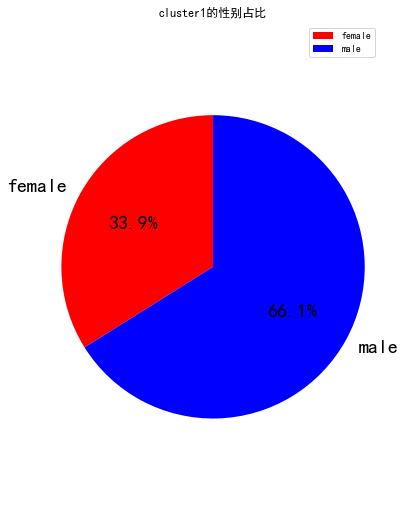

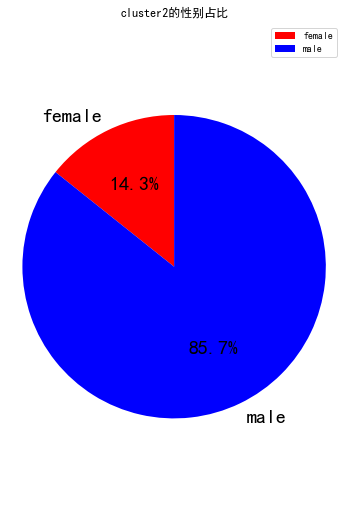

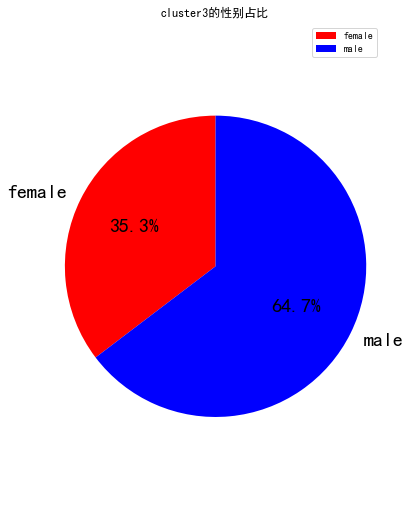

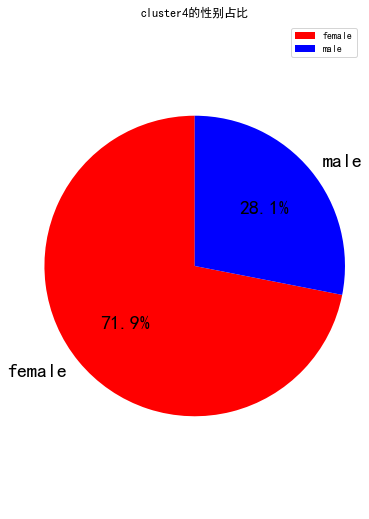

In [41]:
plot_pie_sex(df_clu0_sex,'cluster1的性别占比')
plot_pie_sex(df_clu1_sex,'cluster2的性别占比')
plot_pie_sex(df_clu2_sex,'cluster3的性别占比')
plot_pie_sex(df_clu3_sex,'cluster4的性别占比')

[115, 168, 116, 146]


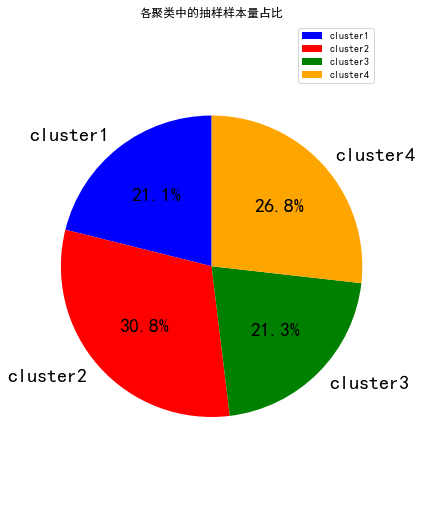

In [44]:
sample_num = [df_clu0.shape[0],df_clu1.shape[0],df_clu2.shape[0],df_clu3.shape[0]]
print(sample_num)

plt.figure(figsize=(6,9))
#定义饼状图的标签，标签是列表
labels = ["cluster1","cluster2","cluster3","cluster4"]
#每个标签占多大，会自动去算百分比
sizes = sample_num
colors = ['blue','red','green','orange']
patches,l_text,p_text = plt.pie(sizes,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
for t in l_text:
    t.set_size(20)
for t in p_text:
    t.set_size(20)
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.legend()
plt.title("各聚类中的抽样样本量占比")
plt.show()

In [43]:
def plot_bar(X,Y,xlabel,ylabel,title):
    fig = plt.figure()
    plt.bar(X,Y,0.4,color=['blue','red','green','orange'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show() 

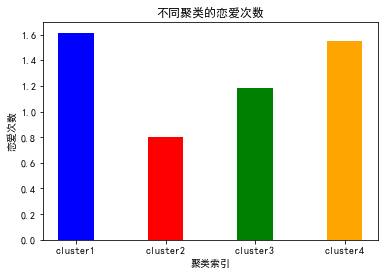

In [45]:
X=['cluster1','cluster2','cluster3','cluster4']
Y=lovetime_clu 
plot_bar(X,Y,"聚类索引","恋爱次数","不同聚类的恋爱次数")

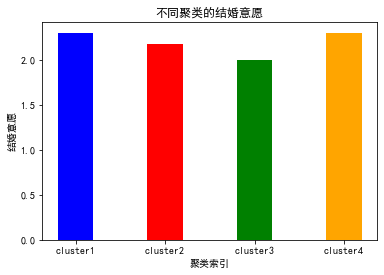

In [46]:
Y=marrintent_clu 
plot_bar(X,Y,"聚类索引","结婚意愿","不同聚类的结婚意愿")

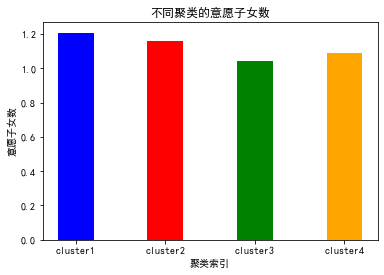

In [47]:
Y = desirechild_clu
plot_bar(X,Y,"聚类索引","意愿子女数","不同聚类的意愿子女数")

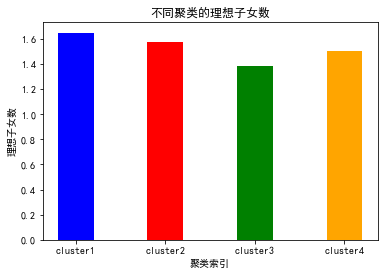

In [48]:
Y = idealchild_clu
plot_bar(X,Y,"聚类索引","理想子女数","不同聚类的理想子女数")

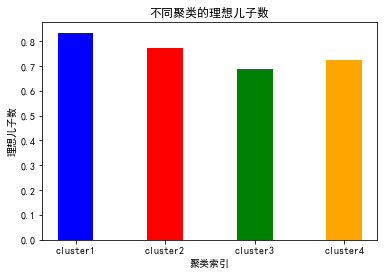

In [49]:
Y = idealboy_clu
plot_bar(X,Y,"聚类索引","理想儿子数","不同聚类的理想儿子数")

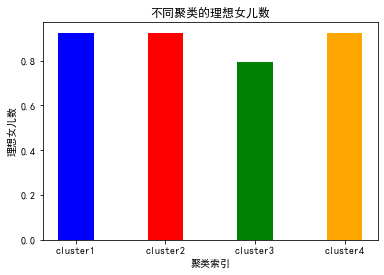

In [50]:
Y = idealgirl_clu
plot_bar(X,Y,"聚类索引","理想女儿数","不同聚类的理想女儿数")

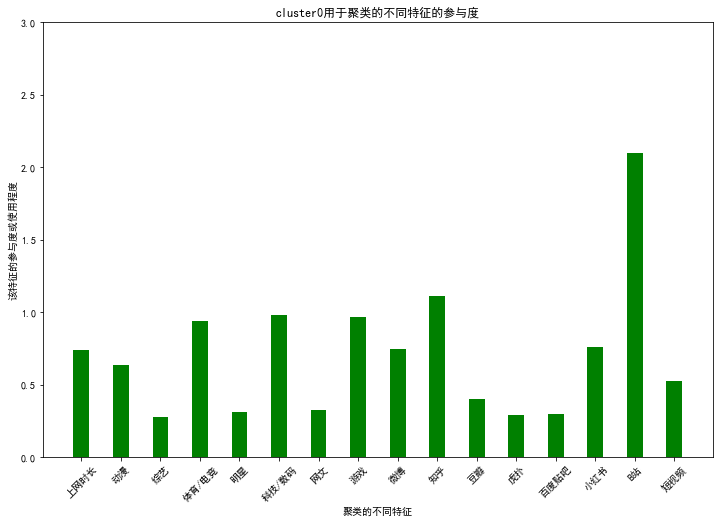

In [335]:
factor_X = ['上网时长','动漫','综艺','体育/电竞','明星','科技/数码','网文','游戏','微博','知乎','豆瓣','虎扑','百度贴吧','小红书','B站','短视频']
factor_Y = df_mean0_factor
fig = plt.figure(figsize=(12,8))
plt.bar(factor_X,factor_Y,0.4,color="green")
plt.xlabel("聚类的不同特征")
plt.ylabel("该特征的参与度或使用程度")
plt.ylim(0,3)
plt.xticks(rotation=45)
plt.title("cluster0用于聚类的不同特征的参与度")
plt.show() 

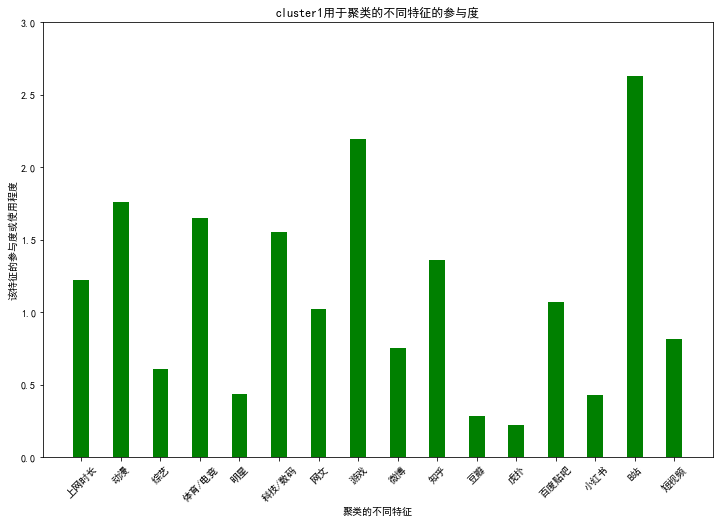

In [133]:
factor_Y = df_mean1_factor
fig = plt.figure(figsize=(12,8))
plt.bar(factor_X,factor_Y,0.4,color="green")
plt.xlabel("聚类的不同特征")
plt.ylabel("该特征的参与度或使用程度")
plt.ylim(0,3)
plt.xticks(rotation=45)
plt.title("cluster1用于聚类的不同特征的参与度")
plt.show() 

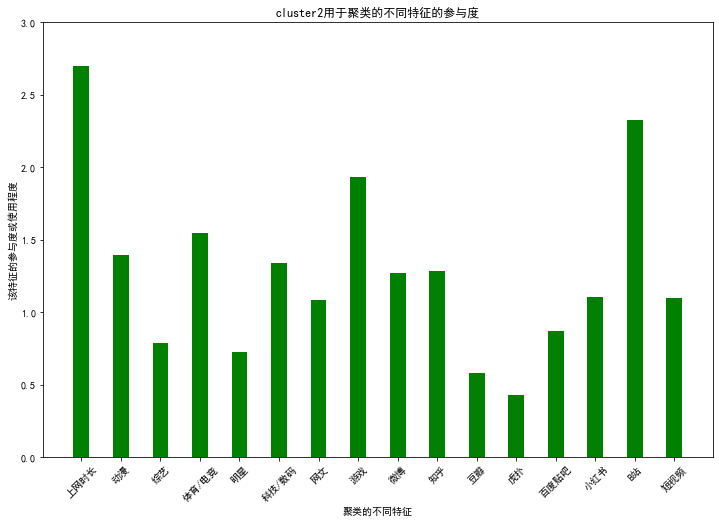

In [134]:
factor_Y = df_mean2_factor
fig = plt.figure(figsize=(12,8))
plt.bar(factor_X,factor_Y,0.4,color="green")
plt.xlabel("聚类的不同特征")
plt.ylabel("该特征的参与度或使用程度")
plt.ylim(0,3)
plt.xticks(rotation=45)
plt.title("cluster2用于聚类的不同特征的参与度")
plt.show() 

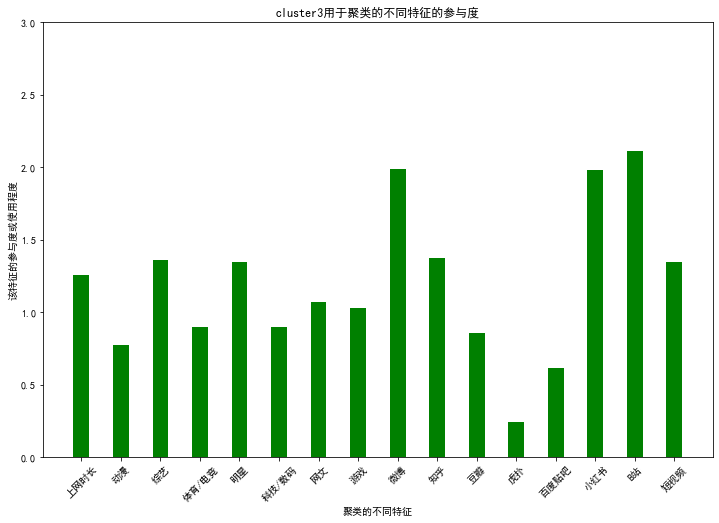

In [135]:
factor_Y = df_mean3_factor
fig = plt.figure(figsize=(12,8))
plt.bar(factor_X,factor_Y,0.4,color="green")
plt.xlabel("聚类的不同特征")
plt.ylabel("该特征的参与度或使用程度")
plt.ylim(0,3)
plt.xticks(rotation=45)
plt.title("cluster3用于聚类的不同特征的参与度")
plt.show() 

#### 附带性别抽样的分析

In [200]:
df_male_chose

,恋爱次数,意愿子女数,理想子女数,理想儿子,理想女儿,性别,户口,单身无恋爱,单身想恋爱,恋爱中,...,小红书,B站,短视频,朋友圈秀恩爱晒娃,恋爱相亲育儿综艺,国家生育政策,专家教授发表看法,娱乐圈情感八卦,身边人经历,艺术作品
0,0,1,2,1,1,1,0,1.0,0.0,0.0,...,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
1,0,1,2,1,1,1,0,0.0,1.0,0.0,...,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
2,2,2,2,1,1,1,0,0.0,1.0,0.0,...,0.0,3.0,1.0,3.0,0.0,2.0,0.0,0.0,2.0,2.0
3,2,2,2,1,1,1,1,1.0,0.0,0.0,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,2,2,1,1,1,1,0.0,0.0,1.0,...,1.0,3.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,1,2,1,1,1,1,0.0,1.0,0.0,...,1.0,3.0,1.0,2.0,0.0,1.0,0.0,0.0,2.0,2.0
196,2,1,1,0,1,1,1,0.0,1.0,0.0,...,1.0,2.0,3.0,2.0,1.0,2.0,1.0,0.0,2.0,1.0
197,0,2,2,1,1,1,1,0.0,1.0,0.0,...,0.0,3.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0
198,1,1,1,1,1,1,1,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [201]:
df_female_chose

,恋爱次数,意愿子女数,理想子女数,理想儿子,理想女儿,性别,户口,单身无恋爱,单身想恋爱,恋爱中,...,小红书,B站,短视频,朋友圈秀恩爱晒娃,恋爱相亲育儿综艺,国家生育政策,专家教授发表看法,娱乐圈情感八卦,身边人经历,艺术作品
0,1,1,1,0,1,0,1,0.0,1.0,0.0,...,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
1,2,1,0,0,1,0,1,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,2,1,1,0,1,1.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0
3,1,0,0,0,0,0,0,0.0,1.0,0.0,...,2.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0
4,1,1,1,0,1,0,1,0.0,1.0,0.0,...,2.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,2,2,1,1,0,1,0.0,1.0,0.0,...,2.0,2.0,0.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0
196,0,1,1,1,1,0,0,1.0,0.0,0.0,...,2.0,2.0,0.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
197,0,0,0,0,0,0,0,0.0,1.0,0.0,...,2.0,3.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0
198,0,0,3,0,0,0,1,1.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0


In [144]:
df_male_chose.dtypes

恋爱次数          int32
意愿子女数         int32
理想子女数         int32
性别            int32
户口            int32
单身无恋爱       float64
单身想恋爱       float64
恋爱中         float64
结婚意愿        float64
上网时长          int32
动漫          float64
综艺          float64
体育/电竞       float64
明星          float64
科技/数码       float64
网文          float64
游戏          float64
微博          float64
知乎          float64
豆瓣          float64
虎扑          float64
百度贴吧        float64
小红书         float64
B站          float64
短视频         float64
朋友圈秀恩爱晒娃    float64
恋爱相亲育儿综艺    float64
国家生育政策      float64
专家教授发表看法    float64
娱乐圈情感八卦     float64
身边人经历       float64
艺术作品        float64
dtype: object

In [247]:
df_male_cluster = df_male_chose.loc[:,'上网时长':'短视频']
df_male_y = df_male_chose.loc[:,['恋爱次数','结婚意愿','意愿子女数','理想子女数','理想儿子','理想女儿']]
df_female_cluster = df_female_chose.loc[:,'上网时长':'短视频']
df_female_y = df_female_chose.loc[:,['恋爱次数','结婚意愿','意愿子女数','理想子女数','理想儿子','理想女儿']]
df_male_sex = df_male_chose.loc[:,'性别']
df_female_sex = df_female_chose.loc[:,'性别']

df_cluster = pd.concat([df_male_cluster,df_female_cluster],axis=0)
df_cluster_y = pd.concat([df_male_y,df_female_y],axis=0)
df_cluster_y = df_cluster_y.reset_index(drop = True)
df_sex = pd.concat([df_male_sex,df_female_sex],axis=0) #抽取出性别，用于聚类的性别分析
df_sex = df_sex.reset_index(drop=True)

In [263]:
df_sex.value_counts()

1    200
0    200
Name: 性别, dtype: int64

In [207]:
df_cluster_y

,恋爱次数,结婚意愿,意愿子女数,理想子女数,理想儿子,理想女儿
0,0,3.0,1,2,1,1
1,0,3.0,1,2,1,1
2,2,3.0,2,2,1,1
3,2,3.0,2,2,1,1
4,1,3.0,2,2,1,1
...,...,...,...,...,...,...
395,1,3.0,2,2,1,1
396,0,3.0,1,1,1,1
397,0,2.0,0,0,0,0
398,0,2.0,0,3,0,0


#### 聚类n_cluster = 4

In [298]:
n_cluster = 4  #聚类的簇数
cluster = KMeans(n_clusters=n_cluster,random_state=63)
cluster_f = cluster.fit(df_cluster)

ypred = cluster_f.labels_  #返回每个样本所返回的标签
ypred = pd.DataFrame(ypred)
ypred.columns = ['聚类所在簇']

C:\Users\24561\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [299]:
df_res = pd.concat([ypred,df_cluster_y,df_sex],axis=1)
df_res.columns = ['聚类所在簇','恋爱次数','结婚意愿','意愿子女数','理想子女数','理想儿子','理想女儿','性别']

df_clu0 = df_res[df_res['聚类所在簇']==0]
df_clu1 = df_res[df_res['聚类所在簇']==1]
df_clu2 = df_res[df_res['聚类所在簇']==2]
df_clu3 = df_res[df_res['聚类所在簇']==3]

df_clu0_sex = df_clu0.loc[:,'性别']
df_clu1_sex = df_clu1.loc[:,'性别']
df_clu2_sex = df_clu2.loc[:,'性别']
df_clu3_sex = df_clu3.loc[:,'性别']

df_mean0 = df_clu0.mean(axis=0)
df_mean1 = df_clu1.mean(axis=0)
df_mean2 = df_clu2.mean(axis=0)
df_mean3 = df_clu3.mean(axis=0)

lovetime_clu = [df_mean0[1],df_mean1[1],df_mean2[1],df_mean3[1]]
marrintent_clu = [df_mean0[2],df_mean1[2],df_mean2[2],df_mean3[2]]
desirechild_clu = [df_mean0[3],df_mean1[3],df_mean2[3],df_mean3[3]]
idealchild_clu = [df_mean0[4],df_mean1[4],df_mean2[4],df_mean3[4]]
idealboy_clu = [df_mean0[5],df_mean1[5],df_mean2[5],df_mean3[5]]
idealgirl_clu = [df_mean0[6],df_mean1[6],df_mean2[6],df_mean3[6]]

print(lovetime_clu)
print(marrintent_clu)
print(desirechild_clu)
print(idealchild_clu)
print(idealboy_clu)
print(idealgirl_clu)

[1.0740740740740742, 1.3796296296296295, 1.1944444444444444, 1.1764705882352942]
[2.2444444444444445, 2.2685185185185186, 2.125, 1.9411764705882353]
[1.162962962962963, 1.037037037037037, 1.0416666666666667, 1.011764705882353]
[1.5925925925925926, 1.5277777777777777, 1.4861111111111112, 1.2823529411764707]
[0.7851851851851852, 0.7037037037037037, 0.7638888888888888, 0.5882352941176471]
[0.9037037037037037, 0.9259259259259259, 0.9166666666666666, 0.7647058823529411]


In [300]:
def plot_pie_sex(df,title):
    plt.figure(figsize=(6,9))
    #定义饼状图的标签，标签是列表
    labels = ["female","male"]
    #每个标签占多大，会自动去算百分比
    sizes = df.value_counts().sort_index()
    colors = ['red','blue']
    patches,l_text,p_text = plt.pie(sizes,labels=labels,colors=colors,
                                    labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                    startangle = 90,pctdistance = 0.6)
    for t in l_text:
        t.set_size(20)
    for t in p_text:
        t.set_size(20)
    # 设置x，y轴刻度一致，这样饼图才能是圆的
    plt.axis('equal')
    plt.legend()
    plt.title(title)
    plt.show()

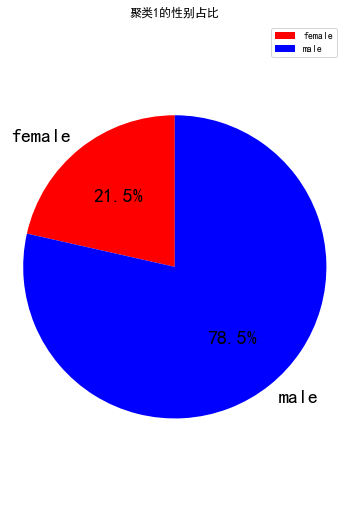

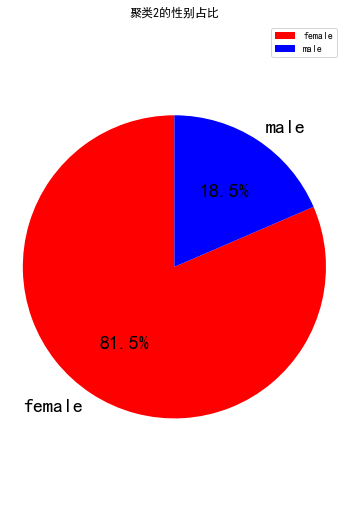

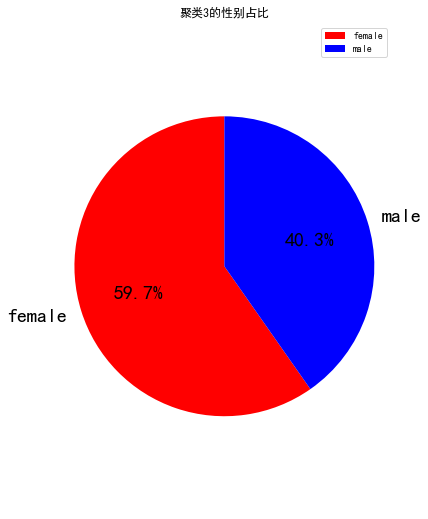

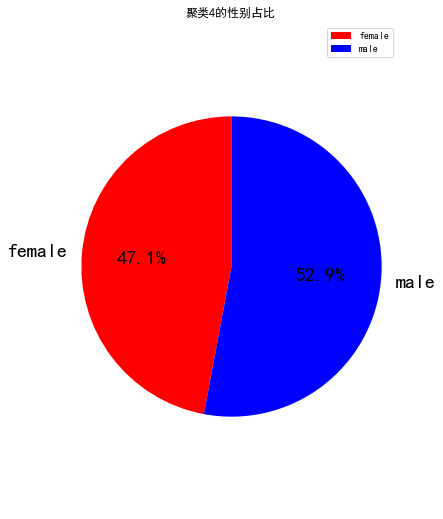

In [301]:
plot_pie_sex(df_clu0_sex,'聚类1的性别占比')
plot_pie_sex(df_clu1_sex,'聚类2的性别占比')
plot_pie_sex(df_clu2_sex,'聚类3的性别占比')
plot_pie_sex(df_clu3_sex,'聚类4的性别占比')

[135, 108, 72, 85]


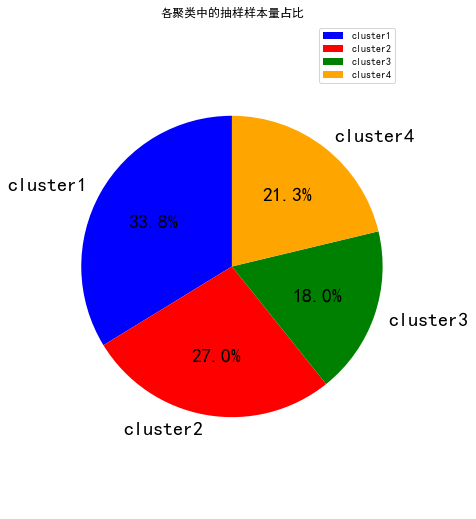

In [302]:
sample_num = [df_clu0.shape[0],df_clu1.shape[0],df_clu2.shape[0],df_clu3.shape[0]]
print(sample_num)

plt.figure(figsize=(6,9))
#定义饼状图的标签，标签是列表
labels = ["cluster1","cluster2","cluster3","cluster4"]
#每个标签占多大，会自动去算百分比
sizes = sample_num
colors = ['blue','red','green','orange']
patches,l_text,p_text = plt.pie(sizes,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
for t in l_text:
    t.set_size(20)
for t in p_text:
    t.set_size(20)
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.legend()
plt.title("各聚类中的抽样样本量占比")
plt.show()

In [304]:
df_factor = pd.concat([ypred,df_inttime,df_circle,df_app],axis=1)
df_factor.columns = ['聚类所在簇','上网时长','动漫','综艺','体育/电竞','明星','科技/数码','网文','游戏','微博','知乎','豆瓣','虎扑','百度贴吧','小红书','B站','短视频']

df_clu0_factor = df_factor[df_factor['聚类所在簇']==0]
df_clu1_factor = df_factor[df_factor['聚类所在簇']==1]
df_clu2_factor = df_factor[df_factor['聚类所在簇']==2]
df_clu3_factor = df_factor[df_factor['聚类所在簇']==3]

df_mean0_factor = pd.DataFrame(df_clu0_factor.mean(axis=0)[1:])
df_mean1_factor = pd.DataFrame(df_clu1_factor.mean(axis=0)[1:])
df_mean2_factor = pd.DataFrame(df_clu2_factor.mean(axis=0)[1:])
df_mean3_factor = pd.DataFrame(df_clu3_factor.mean(axis=0)[1:])

df_mean = pd.concat([df_mean0_factor,df_mean1_factor,df_mean2_factor,df_mean3_factor],axis=1)
df_mean.columns = ['cluster1','cluster2','cluster3','cluster4']

In [305]:
df_mean

,cluster1,cluster2,cluster3,cluster4
上网时长,4.125926,4.129630,4.472222,4.247059
动漫,1.214815,1.148148,1.083333,1.094118
综艺,0.711111,0.833333,0.805556,0.941176
体育/电竞,1.325926,1.259259,1.208333,1.423529
明星,0.592593,0.750000,0.791667,0.847059
科技/数码,1.096296,1.203704,1.291667,1.270588
网文,0.725926,0.962963,1.055556,0.835294
游戏,1.459259,1.546296,1.583333,1.647059
微博,1.148148,1.296296,1.416667,1.376471
知乎,1.303704,1.379630,1.472222,1.164706


In [306]:
def plot_bar(X,Y,xlabel,ylabel,title,ylim):
    fig = plt.figure()
    plt.bar(X,Y,0.4,color=['blue','red','green','orange','purple'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(0,ylim)
    plt.title(title)
    plt.show()

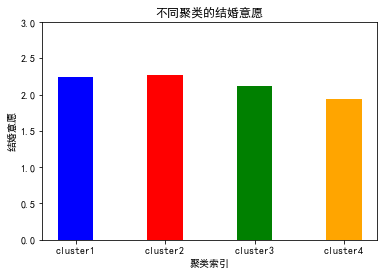

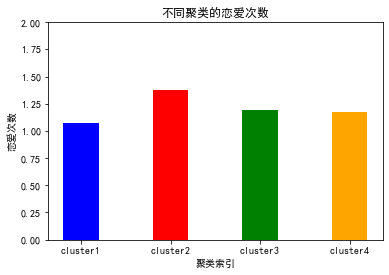

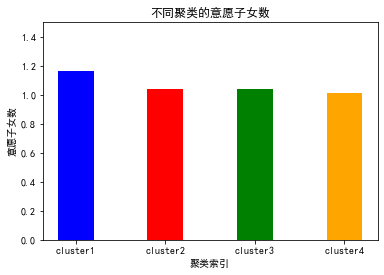

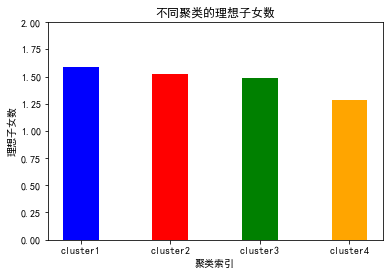

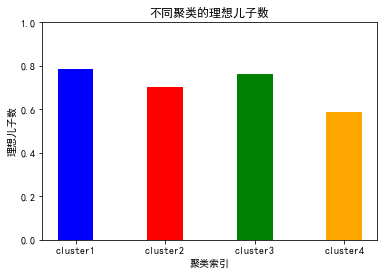

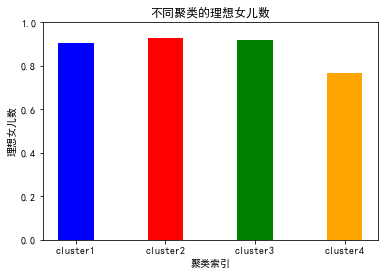

In [307]:
X=['cluster1','cluster2','cluster3','cluster4']
Ym=marrintent_clu 
plot_bar(X,Ym,"聚类索引","结婚意愿","不同聚类的结婚意愿",3)
Yl=lovetime_clu 
plot_bar(X,Yl,"聚类索引","恋爱次数","不同聚类的恋爱次数",2)
Yd=desirechild_clu
plot_bar(X,Yd,"聚类索引","意愿子女数","不同聚类的意愿子女数",1.5)
Yi=idealchild_clu
plot_bar(X,Yi,"聚类索引","理想子女数","不同聚类的理想子女数",2)
Yb=idealboy_clu
plot_bar(X,Yb,"聚类索引","理想儿子数","不同聚类的理想儿子数",1)
Yg=idealgirl_clu
plot_bar(X,Yg,"聚类索引","理想女儿数","不同聚类的理想女儿数",1)

#### 聚类n_cluster = 3

In [169]:
n_cluster = 3  #聚类的簇数
cluster = KMeans(n_clusters=n_cluster,random_state=63)
cluster_f = cluster.fit(df_cluster)

ypred = cluster_f.labels_  #返回每个样本所返回的标签
ypred = pd.DataFrame(ypred)
ypred.columns = ['聚类所在簇']

C:\Users\24561\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [171]:
df_res = pd.concat([ypred,df_cluster_y],axis=1)
df_res.columns = ['聚类所在簇','恋爱次数','结婚意愿','意愿子女数','理想子女数']

df_clu0 = df_res[df_res['聚类所在簇']==0]
df_clu1 = df_res[df_res['聚类所在簇']==1]
df_clu2 = df_res[df_res['聚类所在簇']==2]

df_mean0 = df_clu0.mean(axis=0)
df_mean1 = df_clu1.mean(axis=0)
df_mean2 = df_clu2.mean(axis=0)

lovetime_clu = [df_mean0[1],df_mean1[1],df_mean2[1]]
marrintent_clu = [df_mean0[2],df_mean1[2],df_mean2[2]]
desirechild_clu = [df_mean0[3],df_mean1[3],df_mean2[3]]
idealchild_clu = [df_mean0[4],df_mean1[4],df_mean2[4]]

print(lovetime_clu)
print(marrintent_clu)
print(desirechild_clu)
print(idealchild_clu)

[1.392156862745098, 1.2138364779874213, 1.1818181818181819]
[2.2549019607843137, 2.2138364779874213, 1.9090909090909092]
[1.0130718954248366, 1.1886792452830188, 0.9545454545454546]
[1.4901960784313726, 1.559748427672956, 1.3068181818181819]


#### 聚类n_cluster = 5

In [229]:
n_cluster = 5  #聚类的簇数
cluster = KMeans(n_clusters=n_cluster,random_state=63)
cluster_f = cluster.fit(df_cluster)

ypred = cluster_f.labels_  #返回每个样本所返回的标签
ypred = pd.DataFrame(ypred)
ypred.columns = ['聚类所在簇']

C:\Users\24561\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [257]:
df_res = pd.concat([ypred,df_cluster_y,df_sex],axis=1)
df_res.columns = ['聚类所在簇','恋爱次数','结婚意愿','意愿子女数','理想子女数','理想儿子','理想女儿','性别']

df_clu0 = df_res[df_res['聚类所在簇']==0]
df_clu1 = df_res[df_res['聚类所在簇']==1]
df_clu2 = df_res[df_res['聚类所在簇']==2]
df_clu3 = df_res[df_res['聚类所在簇']==3]
df_clu4 = df_res[df_res['聚类所在簇']==4]

df_clu0_sex = df_clu0.loc[:,'性别']
df_clu1_sex = df_clu1.loc[:,'性别']
df_clu2_sex = df_clu2.loc[:,'性别']
df_clu3_sex = df_clu3.loc[:,'性别']
df_clu4_sex = df_clu4.loc[:,'性别']

df_mean0 = df_clu0.mean(axis=0)
df_mean1 = df_clu1.mean(axis=0)
df_mean2 = df_clu2.mean(axis=0)
df_mean3 = df_clu3.mean(axis=0)
df_mean4 = df_clu4.mean(axis=0)

lovetime_clu = [df_mean0[1],df_mean1[1],df_mean2[1],df_mean3[1],df_mean4[1]]
marrintent_clu = [df_mean0[2],df_mean1[2],df_mean2[2],df_mean3[2],df_mean4[2]]
desirechild_clu = [df_mean0[3],df_mean1[3],df_mean2[3],df_mean3[3],df_mean4[3]]
idealchild_clu = [df_mean0[4],df_mean1[4],df_mean2[4],df_mean3[4],df_mean4[4]]
idealboy_clu = [df_mean0[5],df_mean1[5],df_mean2[5],df_mean3[5],df_mean4[5]]
idealgirl_clu = [df_mean0[6],df_mean1[6],df_mean2[6],df_mean3[6],df_mean4[6]]

print(lovetime_clu)
print(marrintent_clu)
print(desirechild_clu)
print(idealchild_clu)
print(idealboy_clu)
print(idealgirl_clu)

[1.121212121212121, 1.1686746987951808, 1.0275229357798166, 1.626865671641791, 1.1733333333333333]
[2.1363636363636362, 1.927710843373494, 2.18348623853211, 2.4029850746268657, 2.2133333333333334]
[1.0606060606060606, 1.0240963855421688, 1.1009174311926606, 1.1940298507462686, 1.0]
[1.5151515151515151, 1.2891566265060241, 1.5321100917431192, 1.7164179104477613, 1.4266666666666667]
[0.7878787878787878, 0.5903614457831325, 0.7339449541284404, 0.835820895522388, 0.6666666666666666]
[0.9090909090909091, 0.7710843373493976, 0.8899082568807339, 0.9850746268656716, 0.88]


#### 每个聚类的性别分析

In [295]:
def plot_pie_sex(df,title):
    plt.figure(figsize=(6,9))
    #定义饼状图的标签，标签是列表
    labels = ["female","male"]
    #每个标签占多大，会自动去算百分比
    sizes = df.value_counts().sort_index()
    colors = ['red','blue']
    patches,l_text,p_text = plt.pie(sizes,labels=labels,colors=colors,
                                    labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                    startangle = 90,pctdistance = 0.6)
    for t in l_text:
        t.set_size(20)
    for t in p_text:
        t.set_size(20)
    # 设置x，y轴刻度一致，这样饼图才能是圆的
    plt.axis('equal')
    plt.legend()
    plt.title(title)
    plt.show()

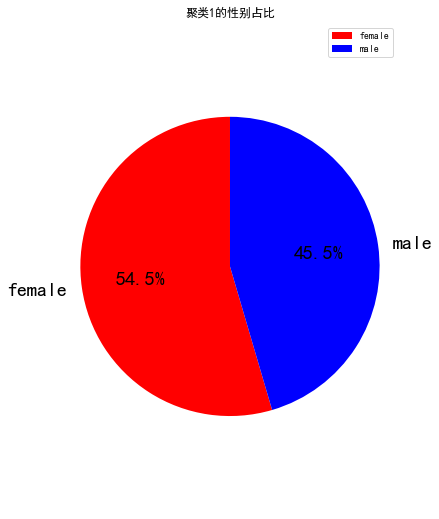

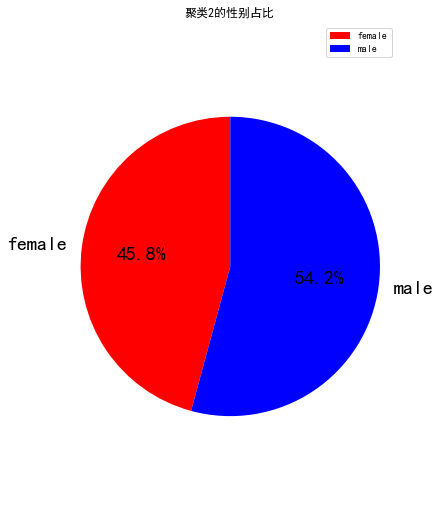

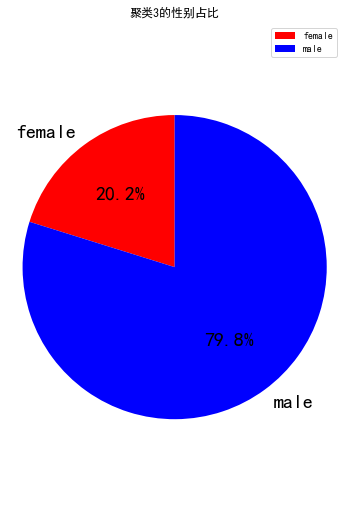

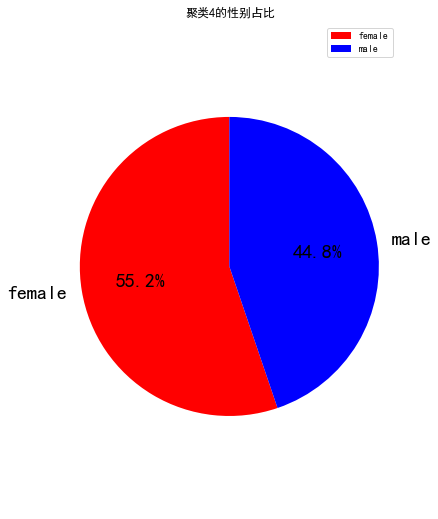

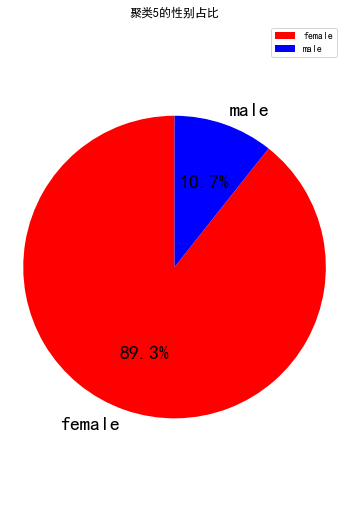

In [296]:
plot_pie_sex(df_clu0_sex,'聚类1的性别占比')
plot_pie_sex(df_clu1_sex,'聚类2的性别占比')
plot_pie_sex(df_clu2_sex,'聚类3的性别占比')
plot_pie_sex(df_clu3_sex,'聚类4的性别占比')
plot_pie_sex(df_clu4_sex,'聚类5的性别占比')

#### 聚类的样本量分析

In [231]:
sample_num = [df_clu0.shape[0],df_clu1.shape[0],df_clu2.shape[0],df_clu3.shape[0],df_clu4.shape[0]]
print(sample_num)

[66, 83, 109, 67, 75]


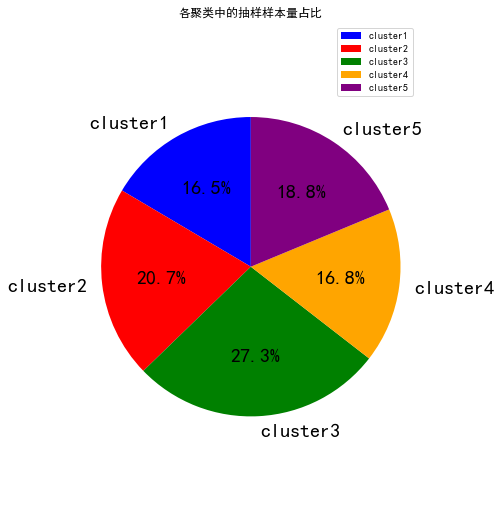

In [297]:
plt.figure(figsize=(6,9))
#定义饼状图的标签，标签是列表
labels = ["cluster1","cluster2","cluster3","cluster4","cluster5"]
#每个标签占多大，会自动去算百分比
sizes = sample_num
colors = ['blue','red','green','orange','purple']
patches,l_text,p_text = plt.pie(sizes,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
for t in l_text:
    t.set_size(20)
for t in p_text:
    t.set_size(20)
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.legend()
plt.title("各聚类中的抽样样本量占比")
plt.show()

#### 每个聚类的特征分析

In [244]:
df_factor = pd.concat([ypred,df_inttime,df_circle,df_app],axis=1)
df_factor.columns = ['聚类所在簇','上网时长','动漫','综艺','体育/电竞','明星','科技/数码','网文','游戏','微博','知乎','豆瓣','虎扑','百度贴吧','小红书','B站','短视频']

df_clu0_factor = df_factor[df_factor['聚类所在簇']==0]
df_clu1_factor = df_factor[df_factor['聚类所在簇']==1]
df_clu2_factor = df_factor[df_factor['聚类所在簇']==2]
df_clu3_factor = df_factor[df_factor['聚类所在簇']==3]
df_clu4_factor = df_factor[df_factor['聚类所在簇']==4]

df_mean0_factor = pd.DataFrame(df_clu0_factor.mean(axis=0)[1:])
df_mean1_factor = pd.DataFrame(df_clu1_factor.mean(axis=0)[1:])
df_mean2_factor = pd.DataFrame(df_clu2_factor.mean(axis=0)[1:])
df_mean3_factor = pd.DataFrame(df_clu3_factor.mean(axis=0)[1:])
df_mean4_factor = pd.DataFrame(df_clu4_factor.mean(axis=0)[1:])

df_mean = pd.concat([df_mean0_factor,df_mean1_factor,df_mean2_factor,df_mean3_factor,df_mean4_factor],axis=1)
df_mean.columns = ['cluster1','cluster2','cluster3','cluster4','cluster5']

In [245]:
df_mean

,cluster1,cluster2,cluster3,cluster4,cluster5
上网时长,4.515152,4.277108,4.211009,4.134328,3.960000
动漫,1.060606,1.096386,1.137615,1.313433,1.146667
综艺,0.803030,0.927711,0.715596,0.940299,0.706667
体育/电竞,1.227273,1.421687,1.266055,1.253731,1.360000
明星,0.833333,0.855422,0.559633,0.776119,0.680000
科技/数码,1.212121,1.265060,1.146789,1.119403,1.253333
网文,1.075758,0.855422,0.724771,0.925373,0.880000
游戏,1.590909,1.650602,1.467890,1.388060,1.640000
微博,1.500000,1.337349,1.119266,1.253731,1.306667
知乎,1.500000,1.168675,1.275229,1.358209,1.386667


In [239]:
type(df_mean0_factor)

pandas.core.series.Series

#### 每个聚类的标签分析

In [291]:
def plot_bar(X,Y,xlabel,ylabel,title,ylim):
    fig = plt.figure()
    plt.bar(X,Y,0.4,color=['blue','red','green','orange','purple'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(0,ylim)
    plt.title(title)
    plt.show()

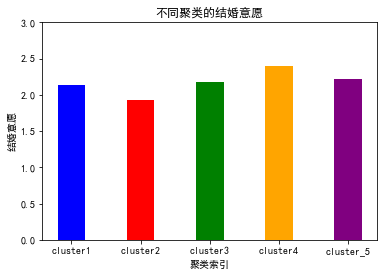

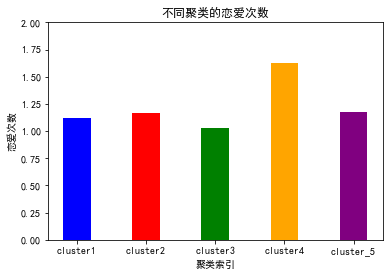

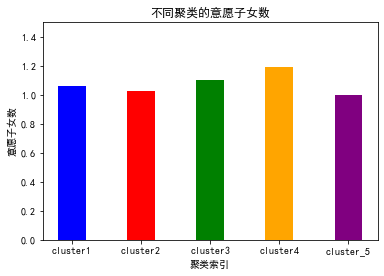

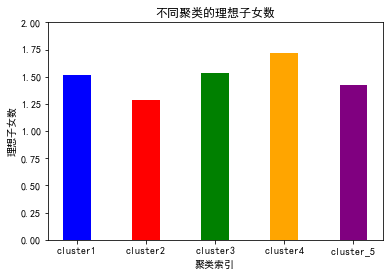

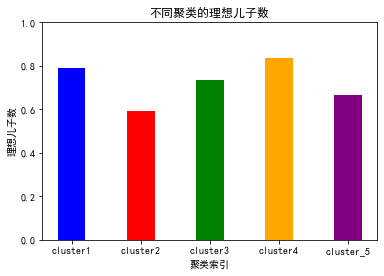

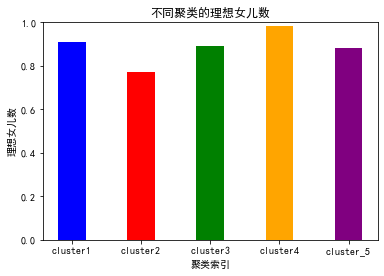

In [292]:
X=['cluster1','cluster2','cluster3','cluster4','cluster_5']
Ym=marrintent_clu 
plot_bar(X,Ym,"聚类索引","结婚意愿","不同聚类的结婚意愿",3)
Yl=lovetime_clu 
plot_bar(X,Yl,"聚类索引","恋爱次数","不同聚类的恋爱次数",2)
Yd=desirechild_clu
plot_bar(X,Yd,"聚类索引","意愿子女数","不同聚类的意愿子女数",1.5)
Yi=idealchild_clu
plot_bar(X,Yi,"聚类索引","理想子女数","不同聚类的理想子女数",2)
Yb=idealboy_clu
plot_bar(X,Yb,"聚类索引","理想儿子数","不同聚类的理想儿子数",1)
Yg=idealgirl_clu
plot_bar(X,Yg,"聚类索引","理想女儿数","不同聚类的理想女儿数",1)